#### Lead Score - Case Study <br>
Problem Statement <br>
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

#### Goals and Objectives <br>
There are quite a few goals for this case study. <br>

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Importing necessary libraries

In [557]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [558]:
## This is help us to show all the columns when you set the max columns to none
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [559]:
lead_df = pd.read_csv(r'C:\Users\anilk\Data_Science\Case Study\Lead_Scoring_Case_Study\Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [560]:
lead_df.shape

(9240, 37)

In [561]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [562]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data preparation or Data Cleaning 
#### We have to understand the data before making any changes to the dataset

In [563]:
## Before making any changes to the original dataframe let's take a copy of the same.
lead_trim_df = lead_df.copy()

In [564]:
## Some of the columns contains values like select. Which means customer didn't select any of the options. 
## So we can consider this select value as null value. Replace select value with null.

for column in lead_trim_df.columns:
    if lead_trim_df[column].dtypes == 'object' and column != 'Prospect ID':
        print(column)
        print('--------------------------------------------------------')
        print(lead_trim_df[column].unique())
        print('--------------------------------------------------------')
        print(' ')

Lead Origin
--------------------------------------------------------
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
--------------------------------------------------------
 
Lead Source
--------------------------------------------------------
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
--------------------------------------------------------
 
Do Not Email
--------------------------------------------------------
['No' 'Yes']
--------------------------------------------------------
 
Do Not Call
--------------------------------------------------------
['No' 'Yes']
--------------------------------------------------------
 
Last Activity
--------------------------------------------------------
['Page Visited on W

In [565]:
## Let's see the null value percentage in each column or feature in the dataset BEFORE replacing select with null value
(lead_trim_df.isnull().sum()/len(lead_trim_df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [566]:
## Replace select string with null value
lead_trim_df = lead_trim_df.replace('Select', np.NaN)

In [567]:
## Let's see the null value percentage in each column or feature in the dataset AFTER replacing select with null value
(lead_trim_df.isnull().sum()/len(lead_trim_df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Dropping Columns
### We are dropping few columns which contains high null values. Here we are considering above 40% null value columns

In [568]:
## We can also drop columns which contains more than 35% null value columns. But don't drop those columns right away
Above_40per_null_columns = ['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index'
                           ,'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
lead_trim_df.drop(Above_40per_null_columns,axis=1,inplace=True)
lead_trim_df.shape

(9240, 30)

In [569]:
(lead_trim_df.isnull().sum()/len(lead_trim_df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [570]:
## We have few more columns with high percentage of nulls. Let's look at them individually
lead_trim_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

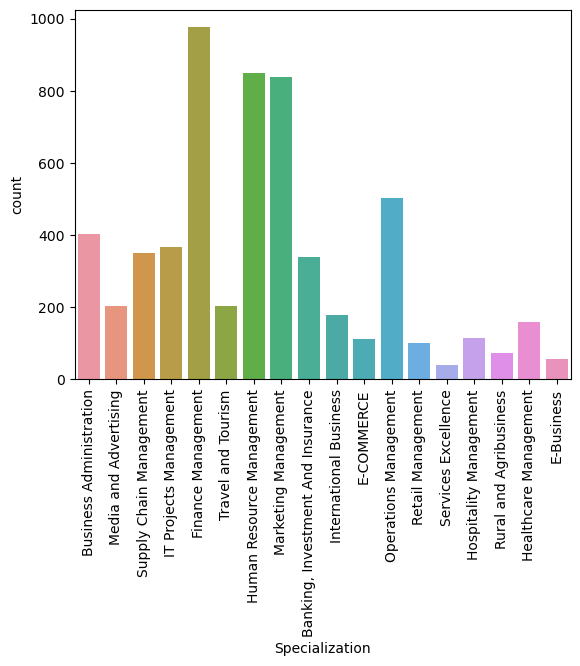

In [571]:
## We can use either histogram or countplot from seaborn for the same purpose
sns.countplot(lead_trim_df['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [572]:
## We have around 36% of missing data for specilization. We can replace with mode. However the customer might not have interest
## in existing course. for time being I'm replacing nulls with other. 

lead_trim_df['Specialization'].replace(np.NaN,'Others',inplace=True)

In [573]:
(lead_trim_df.isnull().sum()/len(lead_trim_df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

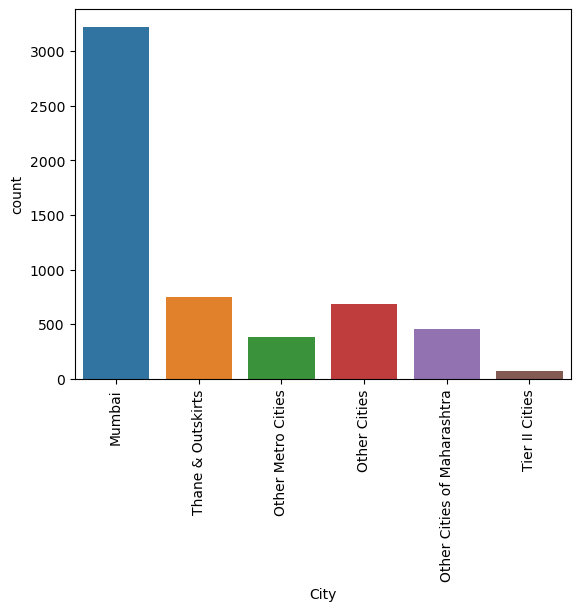

In [574]:
## We can use either histogram or countplot from seaborn for the same purpose
sns.countplot(lead_trim_df['City'])
plt.xticks(rotation=90)
plt.show()

In [575]:
## Replacing null values in the city column with mode value
lead_trim_df['City'].replace(np.NaN,lead_trim_df['City'].mode()[0],inplace=True)

In [576]:
(lead_trim_df.isnull().sum()/len(lead_trim_df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                    0.000000
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

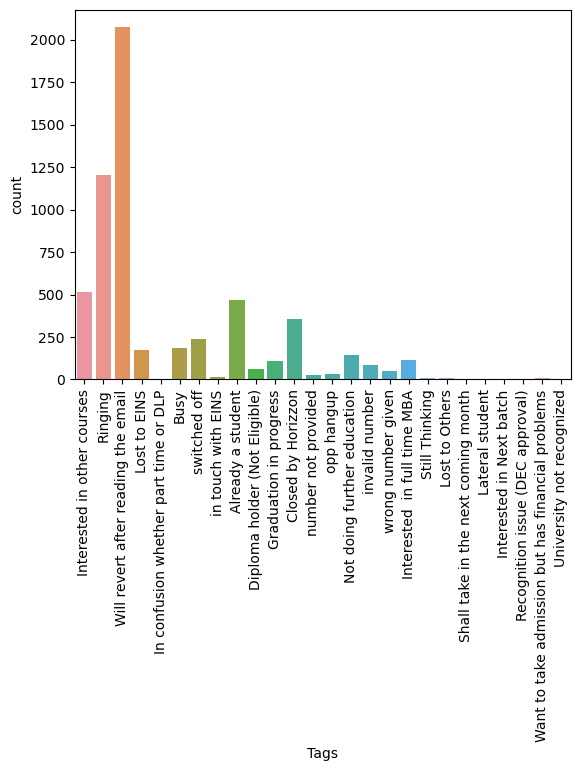

In [577]:
## We can use either histogram or countplot from seaborn for the same purpose
sns.countplot(lead_trim_df['Tags'])
plt.xticks(rotation=90)
plt.show()

In [578]:
## Replacing null values in the Tags column with mode value
lead_trim_df['Tags'].replace(np.NaN,lead_trim_df['Tags'].mode()[0],inplace=True)

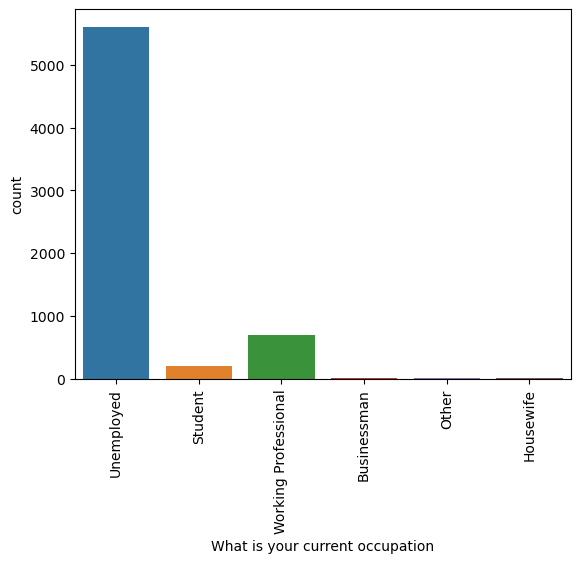

In [579]:
## We can use either histogram or countplot from seaborn for the same purpose
sns.countplot(lead_trim_df['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [580]:
## Replacing null values in the 'What is your current occupation' column with mode value
lead_trim_df['What is your current occupation'].replace(np.NaN,lead_trim_df['What is your current occupation'].mode()[0]
                                                        ,inplace=True)

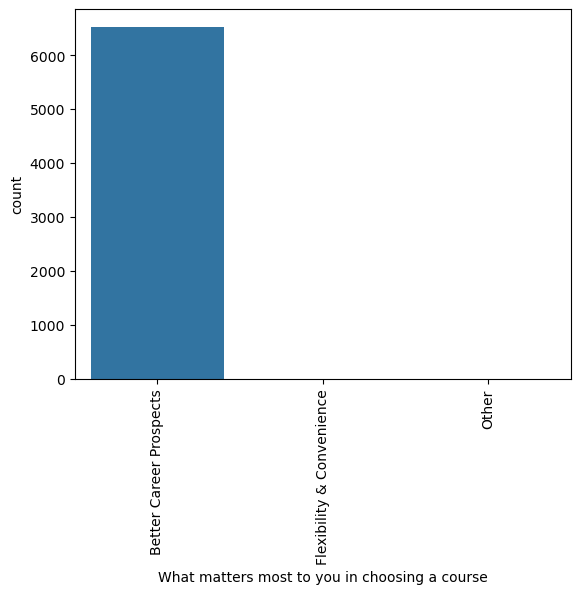

In [581]:
## We can use either histogram or countplot from seaborn for the same purpose
sns.countplot(lead_trim_df['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

In [582]:
lead_trim_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [583]:
## This feature is dominated by 1 value. We call it as skewed column. Let's drop this column
## we have to check if we have such columns in our dataset
lead_trim_df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [584]:
(lead_trim_df.isnull().sum()/len(lead_trim_df))*100

Prospect ID                                  0.000000
Lead Number                                  0.000000
Lead Origin                                  0.000000
Lead Source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total Time Spent on Website                  0.000000
Page Views Per Visit                         1.482684
Last Activity                                1.114719
Country                                     26.634199
Specialization                               0.000000
What is your current occupation              0.000000
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                   

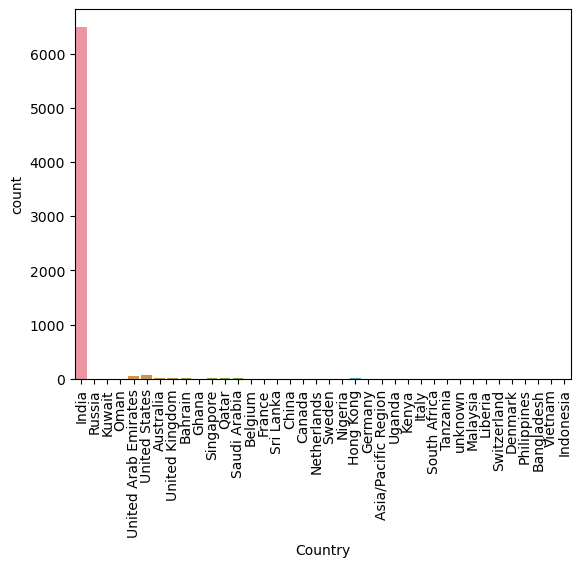

In [585]:
## We can use either histogram or countplot from seaborn for the same purpose
sns.countplot(lead_trim_df['Country'])
plt.xticks(rotation=90)
plt.show()

In [586]:
lead_trim_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [587]:
## Country column is also skewed towards India. Hence we are dropping this column
lead_trim_df.drop('Country',axis=1,inplace=True)
lead_trim_df.shape

(9240, 28)

In [588]:
(lead_trim_df.isnull().sum()/len(lead_trim_df))*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

In [589]:
## Dropping records which contains null values. We are loosing only less information hence dropping them
lead_trim_df.dropna(inplace=True)
lead_trim_df.shape

(9074, 28)

In [590]:
(lead_trim_df.isnull().sum()/len(lead_trim_df))*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [591]:
for column in lead_trim_df.columns:
    if lead_trim_df[column].dtype == 'object' and column != 'Prospect ID':
        print(column)
        print(lead_trim_df[column].unique())
        print(len(lead_trim_df[column].unique()))
        print('----------------------------------------------------------')

Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import']
4
----------------------------------------------------------
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Reference' 'google' 'Welingak Website' 'Facebook' 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
21
----------------------------------------------------------
Do Not Email
['No' 'Yes']
2
----------------------------------------------------------
Do Not Call
['No' 'Yes']
2
----------------------------------------------------------
Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' 'SMS Sent'
 'Visited Booth in Tradeshow' 'Approached upfront'
 'Resubscrib

In [592]:
## Some columns contains only 1 value across the records. These kind of columns or features will not give
## any information to us. We can drop such columns
Single_Value_Columns = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content'
                       ,'Get updates on DM Content','I agree to pay the amount through cheque']
lead_trim_df.drop(Single_Value_Columns,axis=1,inplace=True)
lead_trim_df.shape

(9074, 23)

## Exploratory Data Ananlysis

### Let's do univeriate and bivariate analysis to understand the impact of that feature on our target variable.
### If the feature doesn't have any impact on the target, we can drop such features.
### Let's do the data analysis before doing data convertions.

In [593]:
for column in lead_trim_df.columns:
    print(column)
    print(len(lead_trim_df[column].unique()))
    print('-----------------------')

Prospect ID
9074
-----------------------
Lead Number
9074
-----------------------
Lead Origin
4
-----------------------
Lead Source
21
-----------------------
Do Not Email
2
-----------------------
Do Not Call
2
-----------------------
Converted
2
-----------------------
TotalVisits
41
-----------------------
Total Time Spent on Website
1717
-----------------------
Page Views Per Visit
114
-----------------------
Last Activity
17
-----------------------
Specialization
19
-----------------------
What is your current occupation
6
-----------------------
Search
2
-----------------------
Newspaper Article
2
-----------------------
X Education Forums
2
-----------------------
Newspaper
2
-----------------------
Digital Advertisement
2
-----------------------
Through Recommendations
2
-----------------------
Tags
26
-----------------------
City
6
-----------------------
A free copy of Mastering The Interview
2
-----------------------
Last Notable Activity
16
-----------------------


In [594]:
## Columns which contains unique values across the dataset will not give much information to our problem. 
## We can drop such columns. Here we have 2 features with unique values 'Prospect ID' and 'Lead Number'
## We can't drop 'Prospect ID' as it's useful to identify the customer.
lead_trim_df.drop('Lead Number',axis=1,inplace=True)
lead_trim_df.shape

(9074, 22)

In [595]:
lead_trim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Do Not Call                             9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Specialization                          9074 non-null   obje

In [596]:
## Let's understand the total conversion rate in our dataset.
lead_trim_df['Converted'].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

### Observation 1: 
We have around 38% lead conversion rate in our dataset

In [597]:
(len(lead_trim_df[lead_trim_df['Converted'] == 1])/len(lead_trim_df))*100

37.85541106458012

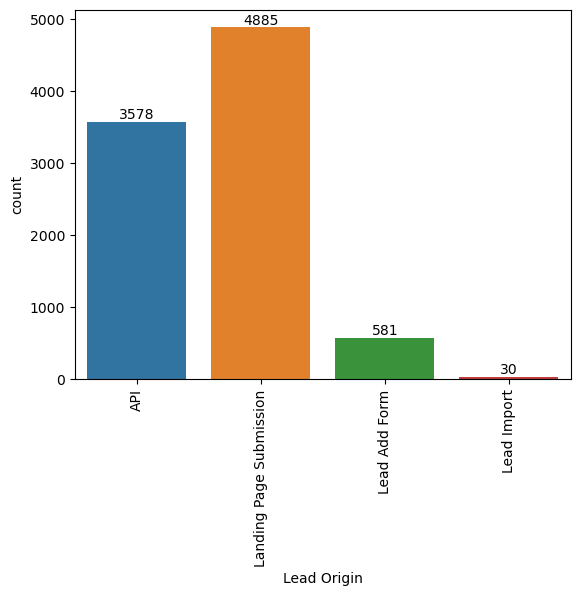

In [598]:
ax = sns.countplot(lead_trim_df['Lead Origin'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

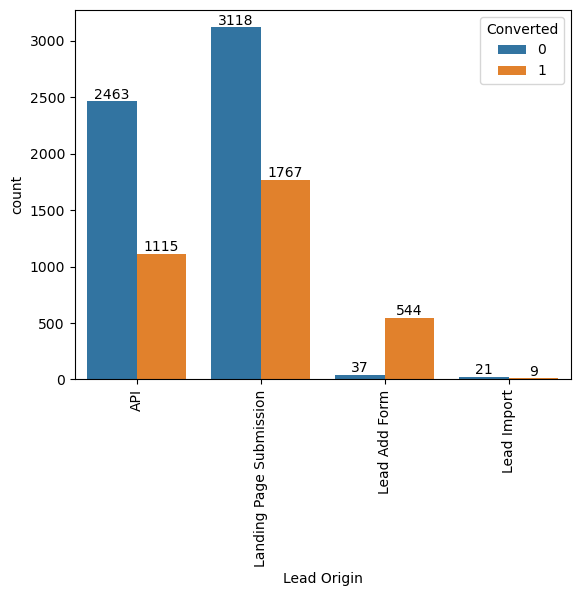

In [599]:
ax = sns.countplot(data = lead_trim_df,x='Lead Origin',hue='Converted')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [600]:
def converted_leads_prct(column_name):
    print('Percentage of converted leads for each segment')
    print('===============================================')
    for category in lead_trim_df[column_name].unique():    
        ## Percentage values based on each segment
        category_converted = len(lead_trim_df[(lead_trim_df[column_name] == category) & (lead_trim_df['Converted'] == 1)])
        category_length = len(lead_trim_df[(lead_trim_df[column_name] == category)])
        total_length = len(lead_trim_df)
        print(category,'conversion rate','-',round((category_converted/category_length)*100,2),'%')
        
        ## percentage values based on overall data
        print('  Subdivision:')
        print('\t',category,'percentage in overall data',round((category_length/total_length)*100,2),'%')
        
        ## Convertion rate of each segment on overall data
        print('\t',category,'conversion percentage in overall data', round((category_converted/total_length)*100,2),'%')
        print('----------------------------------------------')

In [601]:
converted_leads_prct('Lead Origin')

Percentage of converted leads for each segment
API conversion rate - 31.16 %
  Subdivision:
	 API percentage in overall data 39.43 %
	 API conversion percentage in overall data 12.29 %
----------------------------------------------
Landing Page Submission conversion rate - 36.17 %
  Subdivision:
	 Landing Page Submission percentage in overall data 53.84 %
	 Landing Page Submission conversion percentage in overall data 19.47 %
----------------------------------------------
Lead Add Form conversion rate - 93.63 %
  Subdivision:
	 Lead Add Form percentage in overall data 6.4 %
	 Lead Add Form conversion percentage in overall data 6.0 %
----------------------------------------------
Lead Import conversion rate - 30.0 %
  Subdivision:
	 Lead Import percentage in overall data 0.33 %
	 Lead Import conversion percentage in overall data 0.1 %
----------------------------------------------


## Observation 2 
 1. In Lead Origin feature, For 'Lead Add Form' the convertion rate is higher. It stands at 93%. If we can increse the incoming flow through this channel, there is higher chance of conversion rate
 2. Both for 'API' & 'Landing Page Submission' segments convertion rate stands at 31% and 36%. We have a scope to increase the lead conversion in these 2 areas.

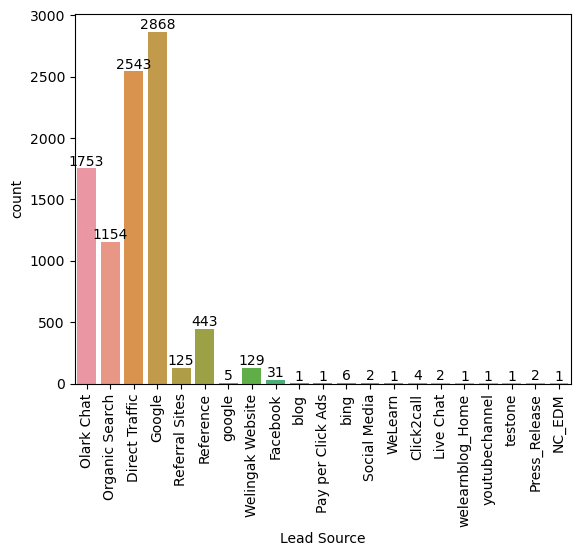

In [602]:
ax = sns.countplot(lead_trim_df['Lead Source'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

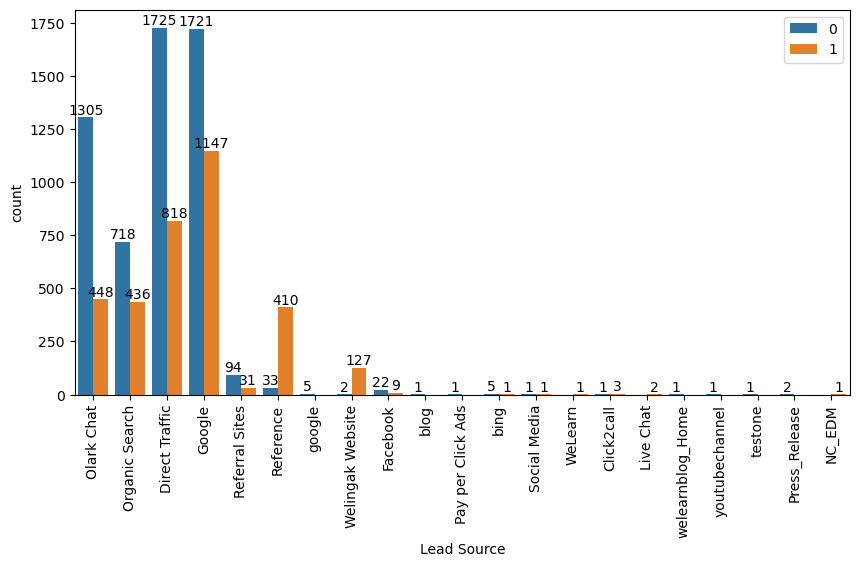

In [603]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = lead_trim_df,x = 'Lead Source',hue='Converted')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.show()

In [604]:
### Here we have two versions of Gogole & google. let's convert them to single string
lead_trim_df['Lead Source'].replace('google','Google',inplace=True)

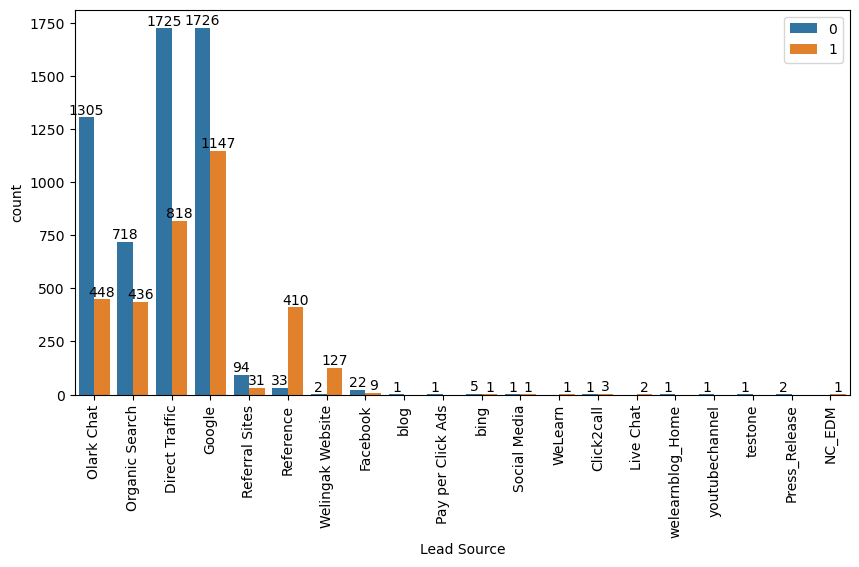

In [605]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = lead_trim_df,x = 'Lead Source',hue='Converted')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.show()

In [606]:
converted_leads_prct('Lead Source')

Percentage of converted leads for each segment
Olark Chat conversion rate - 25.56 %
  Subdivision:
	 Olark Chat percentage in overall data 19.32 %
	 Olark Chat conversion percentage in overall data 4.94 %
----------------------------------------------
Organic Search conversion rate - 37.78 %
  Subdivision:
	 Organic Search percentage in overall data 12.72 %
	 Organic Search conversion percentage in overall data 4.8 %
----------------------------------------------
Direct Traffic conversion rate - 32.17 %
  Subdivision:
	 Direct Traffic percentage in overall data 28.03 %
	 Direct Traffic conversion percentage in overall data 9.01 %
----------------------------------------------
Google conversion rate - 39.92 %
  Subdivision:
	 Google percentage in overall data 31.66 %
	 Google conversion percentage in overall data 12.64 %
----------------------------------------------
Referral Sites conversion rate - 24.8 %
  Subdivision:
	 Referral Sites percentage in overall data 1.38 %
	 Referral Site

In [607]:
## We can club few categorizes into one category as they are small in number
lead_trim_df['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat'
                                    ,'welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM']
                                    ,'Other',inplace=True)

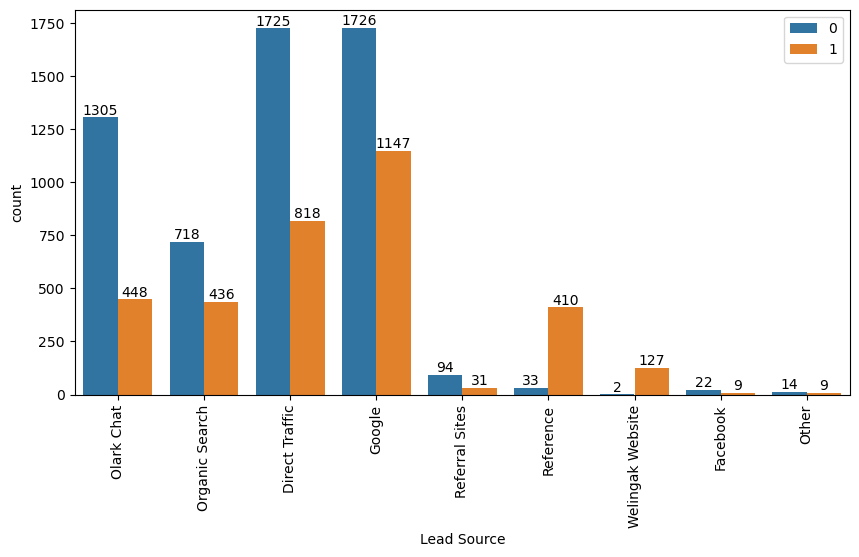

In [608]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = lead_trim_df,x = 'Lead Source',hue='Converted')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.show()

### Observation 3:
1. We have high conversion rate for References. It's stands at 92%. However we have only 5% of references are present
in entire dataset. If we can increse the references we have higher chances of conversion
2. Direct Traffic & Google have good conversion rates of 32% & 39%. We have opportunity here to improve the conversion rates.
3. We also have higher conversion rate for Welingak Website. It's stands at at 98%. However we have only 1.5% of this data
in the entire dataset. If we are able to increase the Welingak Website inflow we can have higher conversion rate thru this.

In [609]:
lead_trim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Do Not Call                             9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Specialization                          9074 non-null   obje

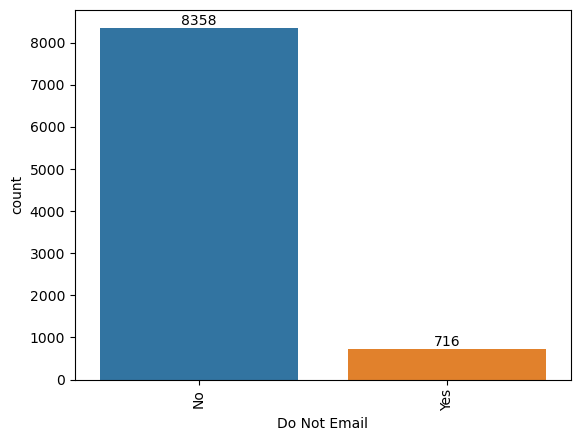

In [610]:
ax = sns.countplot(data = lead_trim_df,x = 'Do Not Email')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

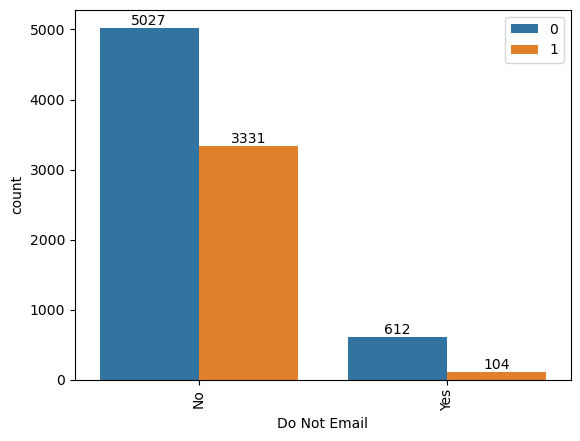

In [611]:
## There is no trend that we can see in the Do Not Email category. This category is also skewed as we have more No's data.
## 92% of the data is related to No's. We can drop this column
ax = sns.countplot(data = lead_trim_df,x = 'Do Not Email',hue='Converted')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.show()

In [612]:
converted_leads_prct('Do Not Email')

Percentage of converted leads for each segment
No conversion rate - 39.85 %
  Subdivision:
	 No percentage in overall data 92.11 %
	 No conversion percentage in overall data 36.71 %
----------------------------------------------
Yes conversion rate - 14.53 %
  Subdivision:
	 Yes percentage in overall data 7.89 %
	 Yes conversion percentage in overall data 1.15 %
----------------------------------------------


In [613]:
## Dropping 'Do Not Email' feature. It gives no information to us and it's also skewed
lead_trim_df.drop('Do Not Email',axis=1,inplace=True)
lead_trim_df.shape

(9074, 21)

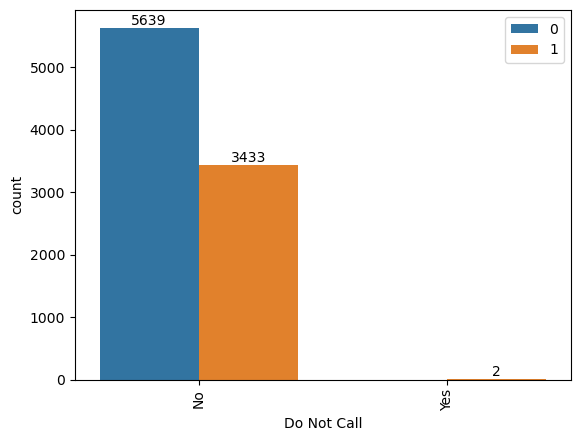

In [614]:
## 99% of data is related to No's in Do Not Call category. We can drop this column
ax = sns.countplot(data = lead_trim_df,x = 'Do Not Call',hue='Converted')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.legend(loc = 'upper right')
plt.show()

In [615]:
converted_leads_prct('Do Not Call')

Percentage of converted leads for each segment
No conversion rate - 37.84 %
  Subdivision:
	 No percentage in overall data 99.98 %
	 No conversion percentage in overall data 37.83 %
----------------------------------------------
Yes conversion rate - 100.0 %
  Subdivision:
	 Yes percentage in overall data 0.02 %
	 Yes conversion percentage in overall data 0.02 %
----------------------------------------------


In [616]:
## Dropping 'Do Not Call' feature. It gives no information to us and it's also skewed
lead_trim_df.drop('Do Not Call',axis=1,inplace=True)
lead_trim_df.shape

(9074, 20)

In [617]:
lead_trim_df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

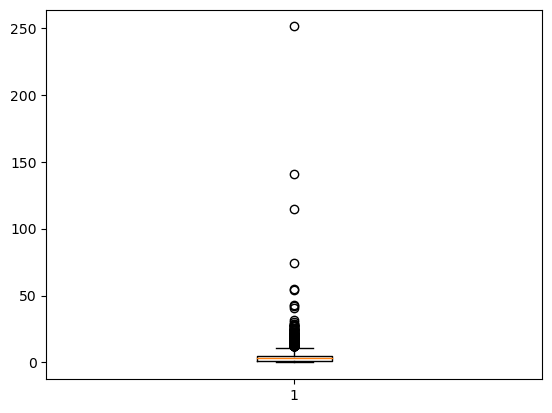

In [618]:
plt.boxplot(lead_trim_df['TotalVisits'])
plt.show()

### Observation 4
We have lot of outliers in the dataset. TotalVisits 75% is 5 and maximum value is 251. which says we have lot of outliers.
let's consider only till 90 percentile or 95 percentail

Total Visits feature doesn't give much information. Median for both converted(3) and non converted(4) looks similar. We can drop this column as well

In [619]:
lower_limit = lead_trim_df['TotalVisits'].quantile(0.05)
upper_limit = lead_trim_df['TotalVisits'].quantile(0.99)
lead_Totalvisits = lead_trim_df[(lead_trim_df['TotalVisits'] > lower_limit) & (lead_trim_df['TotalVisits'] < upper_limit)]

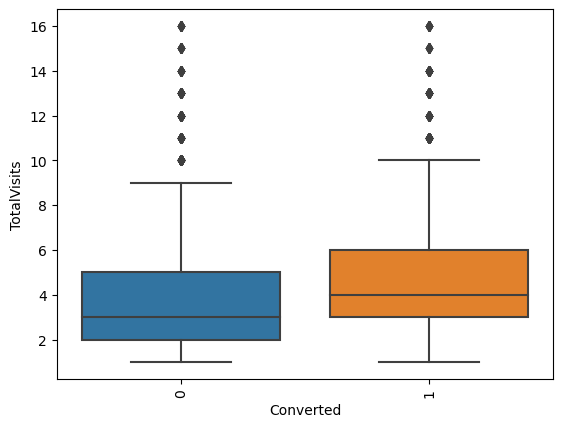

In [620]:
sns.boxplot(y='TotalVisits',x='Converted',data = lead_Totalvisits)
plt.xticks(rotation=90)
plt.show()

In [621]:
#Total Time Spent on Website
lead_trim_df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

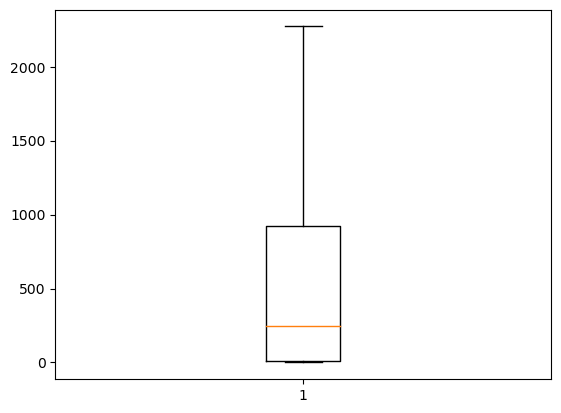

In [622]:
plt.boxplot(lead_trim_df['Total Time Spent on Website'])
plt.show()

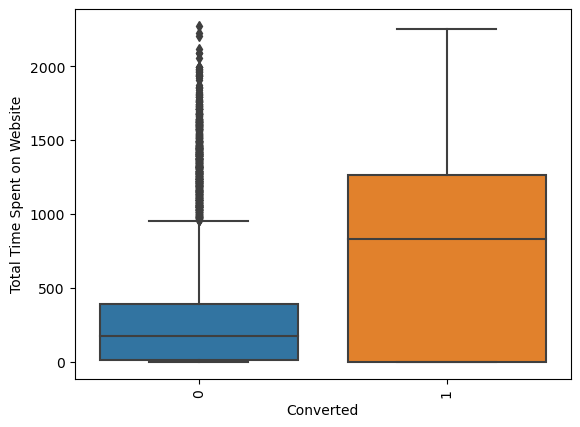

In [623]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data = lead_trim_df)
plt.xticks(rotation=90)
plt.show()

### Observation 5
People who are spending more time in the website have the higher conversion rate

In [624]:
lead_trim_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

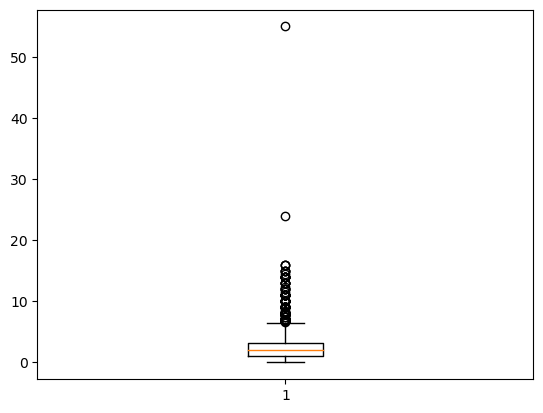

In [625]:
plt.boxplot(lead_trim_df['Page Views Per Visit'])
plt.show()

In [626]:
lower_limit = lead_trim_df['Page Views Per Visit'].quantile(0.05)
upper_limit = lead_trim_df['Page Views Per Visit'].quantile(0.99)
lead_PageViews = lead_trim_df[(lead_trim_df['TotalVisits'] > lower_limit) & (lead_trim_df['TotalVisits'] < upper_limit)]

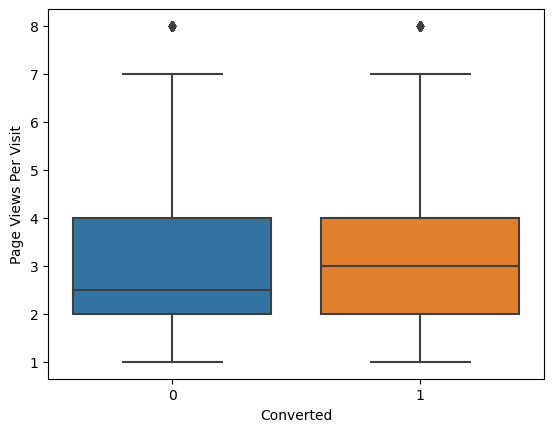

In [627]:
sns.boxplot(data = lead_PageViews, x = 'Converted',y = 'Page Views Per Visit')
plt.show()

### Observation 6
Page Views Per Visit feature median is more or less same for both converted and non converted leads. Its giving no info for us

In [628]:
lead_trim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Search                                  9074 non-null   obje

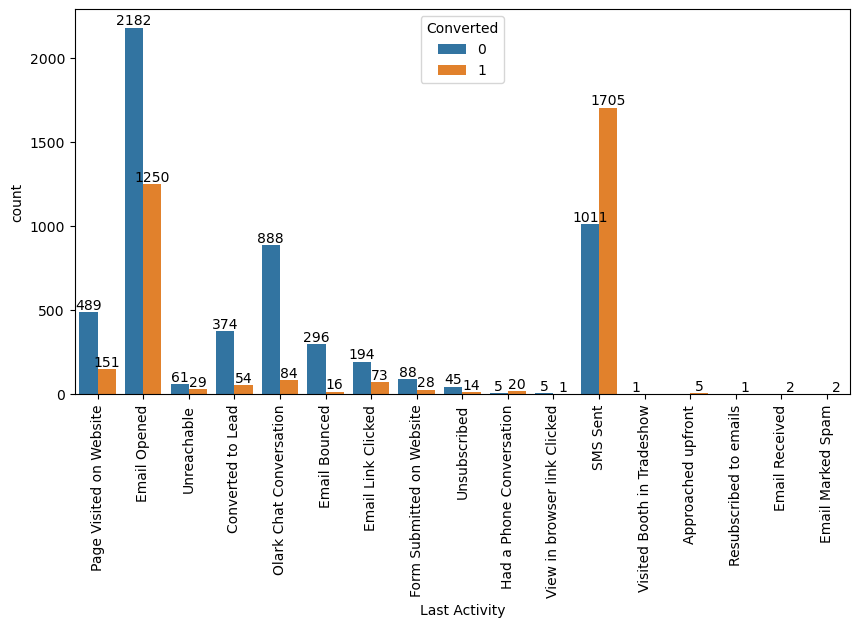

In [629]:
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['Last Activity'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [630]:
### We can club few categorizes which have less values into 1 single category
lead_trim_df['Last Activity'].replace(['Unreachable','Email Bounced','Email Link Clicked','Form Submitted on Website'
                                      ,'Unsubscribed','Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow'
                                      ,'Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam']
                                      ,'Other',inplace=True)

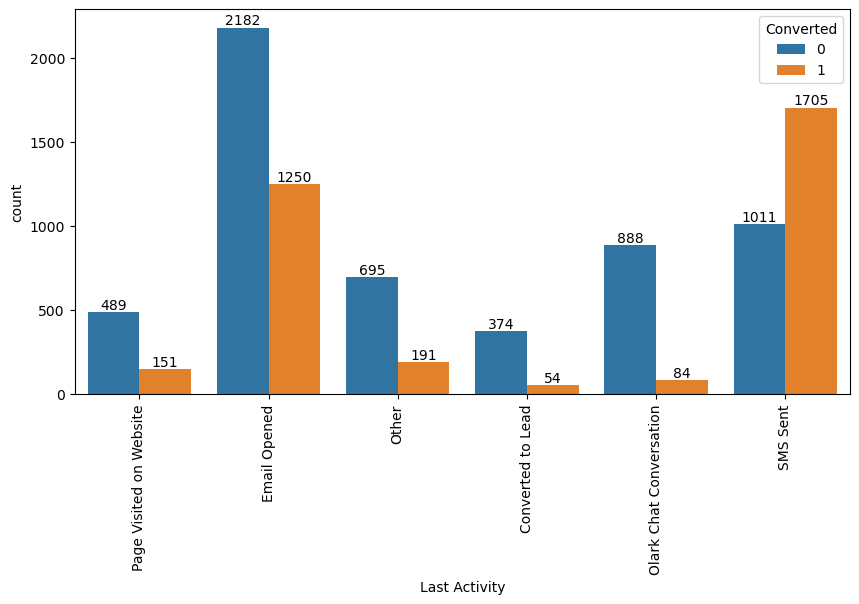

In [631]:
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['Last Activity'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [632]:
converted_leads_prct('Last Activity')

Percentage of converted leads for each segment
Page Visited on Website conversion rate - 23.59 %
  Subdivision:
	 Page Visited on Website percentage in overall data 7.05 %
	 Page Visited on Website conversion percentage in overall data 1.66 %
----------------------------------------------
Email Opened conversion rate - 36.42 %
  Subdivision:
	 Email Opened percentage in overall data 37.82 %
	 Email Opened conversion percentage in overall data 13.78 %
----------------------------------------------
Other conversion rate - 21.56 %
  Subdivision:
	 Other percentage in overall data 9.76 %
	 Other conversion percentage in overall data 2.1 %
----------------------------------------------
Converted to Lead conversion rate - 12.62 %
  Subdivision:
	 Converted to Lead percentage in overall data 4.72 %
	 Converted to Lead conversion percentage in overall data 0.6 %
----------------------------------------------
Olark Chat Conversation conversion rate - 8.64 %
  Subdivision:
	 Olark Chat Conversat

## Observation 7
1. SMS Sent category has higher conversion rate. It stands at 63%. If we can increase the influx of this category 
we can have better conversion rate
2. Email Opened is another category which has conversion rate at 36%. We have to understand this and try to improve 
conversion rate for this category

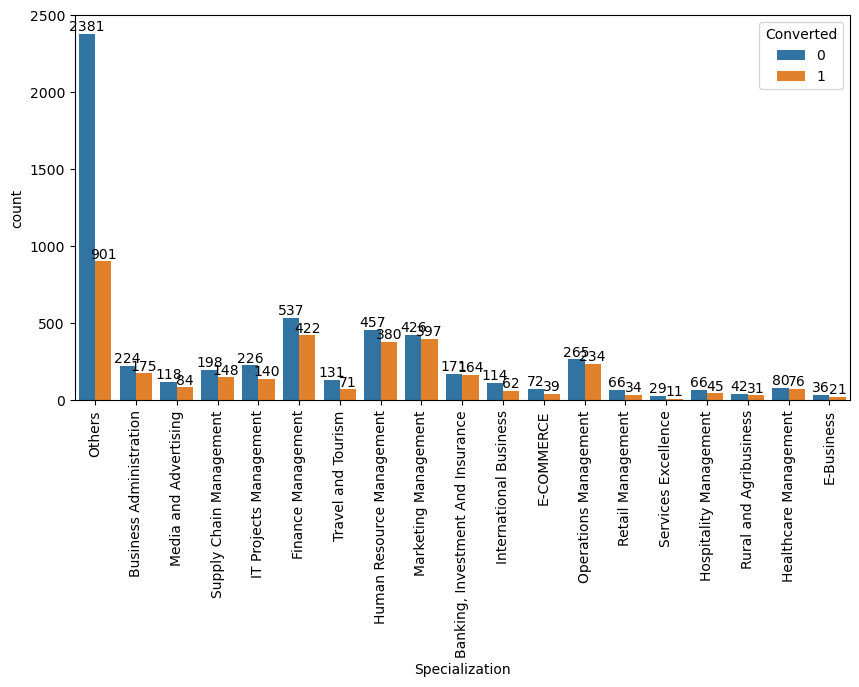

In [633]:
## Almost all the specialization categories follows similar conversion pattern
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['Specialization'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [634]:
converted_leads_prct('Specialization')

Percentage of converted leads for each segment
Others conversion rate - 27.45 %
  Subdivision:
	 Others percentage in overall data 36.17 %
	 Others conversion percentage in overall data 9.93 %
----------------------------------------------
Business Administration conversion rate - 43.86 %
  Subdivision:
	 Business Administration percentage in overall data 4.4 %
	 Business Administration conversion percentage in overall data 1.93 %
----------------------------------------------
Media and Advertising conversion rate - 41.58 %
  Subdivision:
	 Media and Advertising percentage in overall data 2.23 %
	 Media and Advertising conversion percentage in overall data 0.93 %
----------------------------------------------
Supply Chain Management conversion rate - 42.77 %
  Subdivision:
	 Supply Chain Management percentage in overall data 3.81 %
	 Supply Chain Management conversion percentage in overall data 1.63 %
----------------------------------------------
IT Projects Management conversion rate

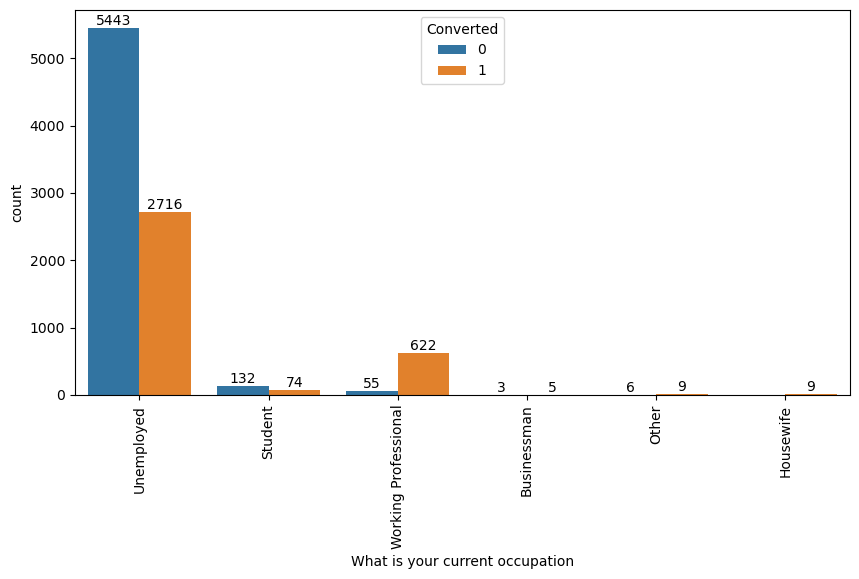

In [635]:
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['What is your current occupation'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

### Observation 8
1. Working professionals have higher conversion rate
2. Many unemployed are visiting the website. We can target this category to boost the conversion.

In [636]:
lead_trim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Search                                  9074 non-null   obje

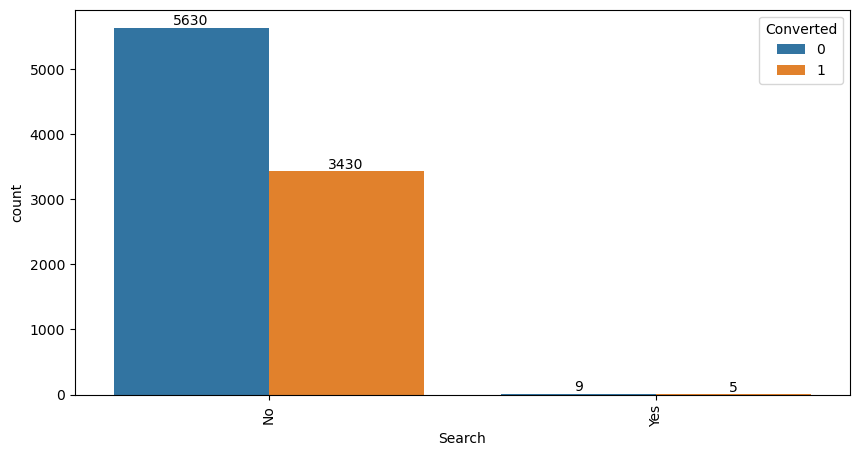

In [637]:
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['Search'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [638]:
lead_trim_df['Search'].value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

In [639]:
## We can drop this search column as majority of the data is belong to 'No' category
lead_trim_df.drop('Search',axis=1,inplace=True)
lead_trim_df.shape

(9074, 19)

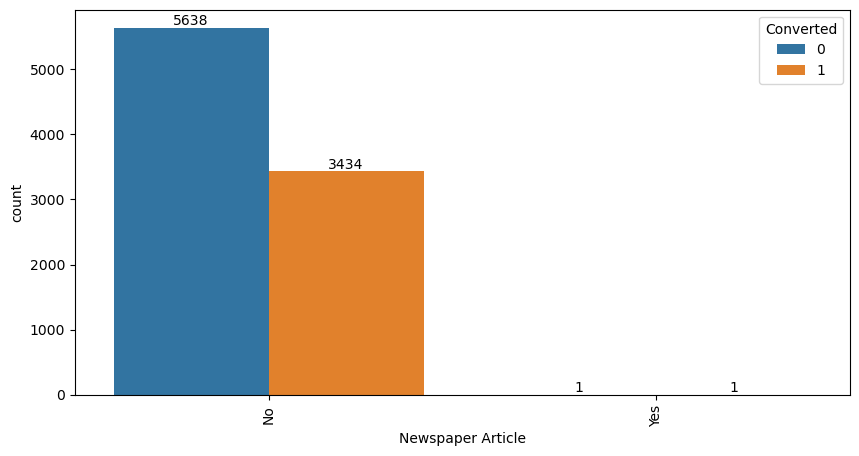

In [640]:
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['Newspaper Article'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [641]:
lead_trim_df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [642]:
## We can drop 'Newspaper Article' column as most of the data is related to 'No' category
lead_trim_df.drop('Newspaper Article',axis= 1,inplace=True)
lead_trim_df.shape

(9074, 18)

In [643]:
lead_trim_df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [644]:
## we can drop 'X Education Forums' column as most of the data is related to 'No' category
lead_trim_df.drop('X Education Forums',axis= 1,inplace=True)
lead_trim_df.shape

(9074, 17)

In [645]:
lead_trim_df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [646]:
## we can drop 'Newspaper' column as most of the data is related to 'No' category
lead_trim_df.drop('Newspaper',axis= 1,inplace=True)
lead_trim_df.shape

(9074, 16)

In [647]:
lead_trim_df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [648]:
## we can drop 'Digital Advertisement' column as most of the data is related to 'No' category
lead_trim_df.drop('Digital Advertisement',axis= 1,inplace=True)
lead_trim_df.shape

(9074, 15)

In [649]:
lead_trim_df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [650]:
## we can drop 'Through Recommendations' column as most of the data is related to 'No' category
lead_trim_df.drop('Through Recommendations',axis= 1,inplace=True)
lead_trim_df.shape

(9074, 14)

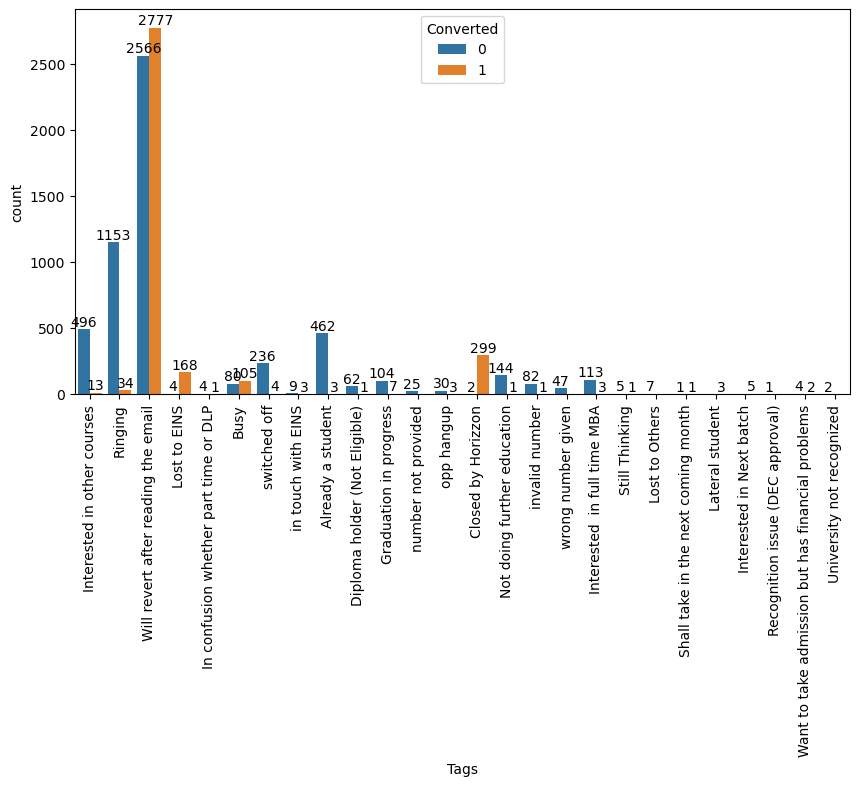

In [651]:
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['Tags'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

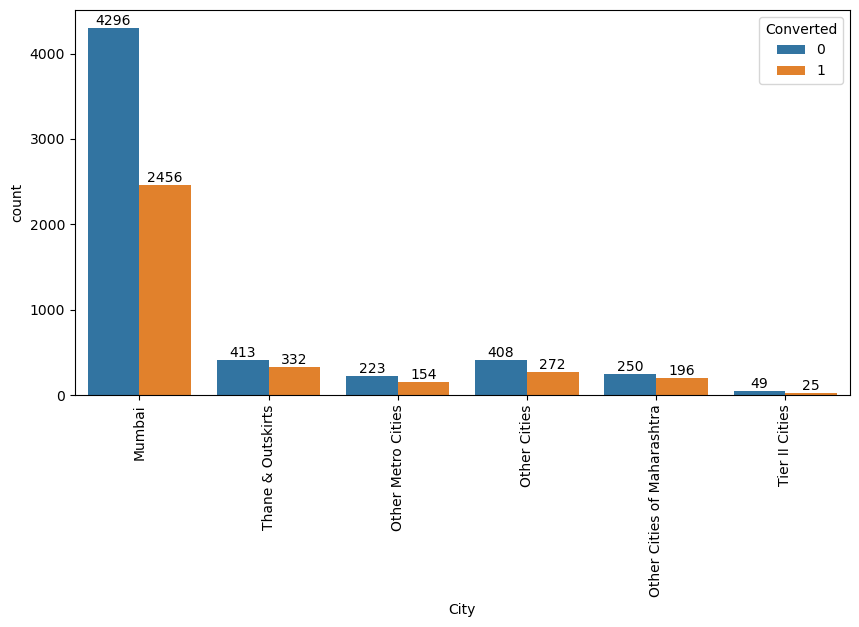

In [652]:
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['City'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [653]:
converted_leads_prct('City')

Percentage of converted leads for each segment
Mumbai conversion rate - 36.37 %
  Subdivision:
	 Mumbai percentage in overall data 74.41 %
	 Mumbai conversion percentage in overall data 27.07 %
----------------------------------------------
Thane & Outskirts conversion rate - 44.56 %
  Subdivision:
	 Thane & Outskirts percentage in overall data 8.21 %
	 Thane & Outskirts conversion percentage in overall data 3.66 %
----------------------------------------------
Other Metro Cities conversion rate - 40.85 %
  Subdivision:
	 Other Metro Cities percentage in overall data 4.15 %
	 Other Metro Cities conversion percentage in overall data 1.7 %
----------------------------------------------
Other Cities conversion rate - 40.0 %
  Subdivision:
	 Other Cities percentage in overall data 7.49 %
	 Other Cities conversion percentage in overall data 3.0 %
----------------------------------------------
Other Cities of Maharashtra conversion rate - 43.95 %
  Subdivision:
	 Other Cities of Maharashtra 

### Observation 9
Mumbai and it's surroundings have higher conversion rate.

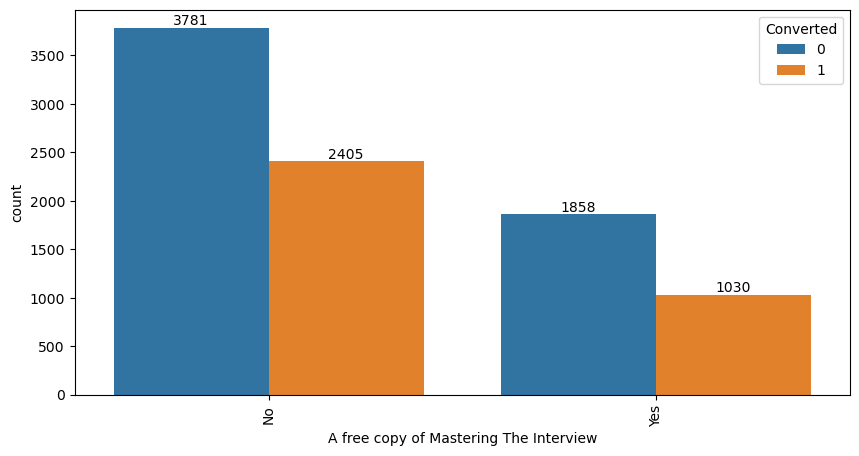

In [654]:
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['A free copy of Mastering The Interview'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [655]:
converted_leads_prct('A free copy of Mastering The Interview')

Percentage of converted leads for each segment
No conversion rate - 38.88 %
  Subdivision:
	 No percentage in overall data 68.17 %
	 No conversion percentage in overall data 26.5 %
----------------------------------------------
Yes conversion rate - 35.66 %
  Subdivision:
	 Yes percentage in overall data 31.83 %
	 Yes conversion percentage in overall data 11.35 %
----------------------------------------------


### Observation 10
Both 'No' and 'Yes' categories have similar conversion rates. We can't infer anything from this feature

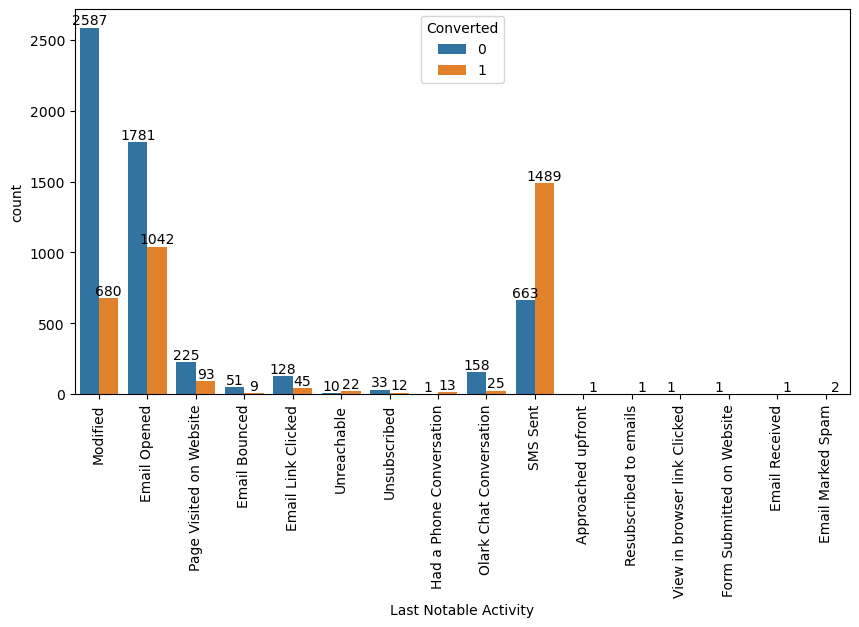

In [656]:
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['Last Notable Activity'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

In [657]:
converted_leads_prct('Last Notable Activity')

Percentage of converted leads for each segment
Modified conversion rate - 20.81 %
  Subdivision:
	 Modified percentage in overall data 36.0 %
	 Modified conversion percentage in overall data 7.49 %
----------------------------------------------
Email Opened conversion rate - 36.91 %
  Subdivision:
	 Email Opened percentage in overall data 31.11 %
	 Email Opened conversion percentage in overall data 11.48 %
----------------------------------------------
Page Visited on Website conversion rate - 29.25 %
  Subdivision:
	 Page Visited on Website percentage in overall data 3.5 %
	 Page Visited on Website conversion percentage in overall data 1.02 %
----------------------------------------------
Email Bounced conversion rate - 15.0 %
  Subdivision:
	 Email Bounced percentage in overall data 0.66 %
	 Email Bounced conversion percentage in overall data 0.1 %
----------------------------------------------
Email Link Clicked conversion rate - 26.01 %
  Subdivision:
	 Email Link Clicked percentag

In [658]:
lead_trim_df['Last Notable Activity'].replace(['Last Notable Activity','Email Link Clicked','Unreachable','Unsubscribed',
                                              'Had a Phone Conversation','Approached upfront','Resubscribed to emails',
                                              'View in browser link Clicked','Form Submitted on Website','Email Received',
                                              'Email Marked Spam']
                                              ,'Other',inplace=True)

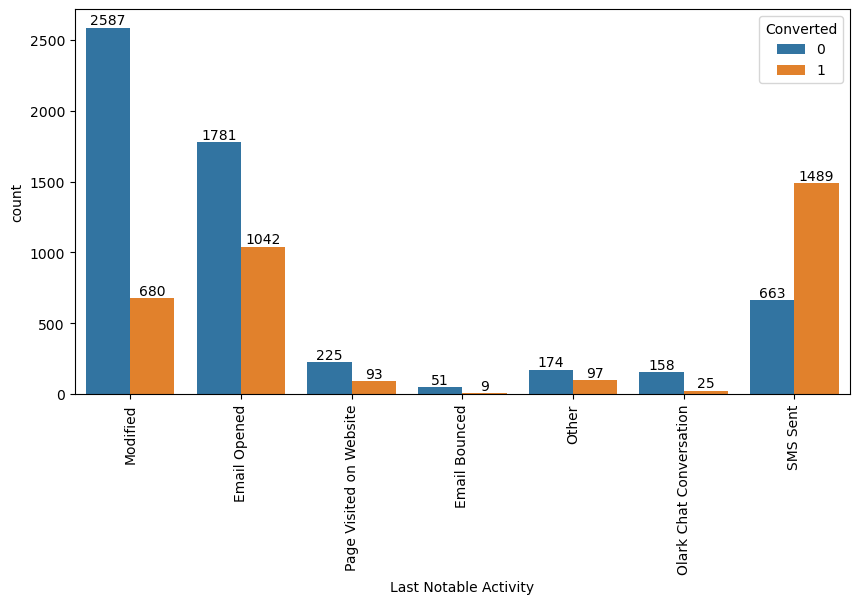

In [659]:
plt.figure(figsize=(10,5))
ax = sns.countplot(lead_trim_df['Last Notable Activity'],hue=lead_trim_df['Converted'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.show()

### Observation 11
1. SMS Sent has the higher conversion rate
2. Email Opened also has very good conversion rate

In [660]:
## Remaining features in our dataset
lead_trim_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

### Data conversion and creating dummy variables

In [661]:
dummies_list = []
for column in lead_trim_df.columns:
    if lead_trim_df[column].dtypes == 'object' and column != 'Prospect ID':        
        dummies_list.append(column)
print(dummies_list)

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [662]:
dummies = pd.get_dummies(lead_trim_df[dummies_list],drop_first=True)
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [663]:
dummies.shape

(9074, 76)

In [664]:
lead_trim_df.drop(dummies_list,axis=1,inplace=True)
lead_trim_df.shape

(9074, 5)

In [665]:
lead_trim_df = pd.concat([lead_trim_df,dummies],axis=1)
lead_trim_df.shape

(9074, 81)

### Imported all the necessary modules for model building

In [666]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [667]:
x = lead_trim_df.drop(['Prospect ID','Converted'],axis=1)
y = lead_trim_df['Converted']
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [668]:
### Scaling few columns
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

### Feature Selection using Recursive Feature Elimination - RFE

In [669]:
log_reg = LogisticRegression()
rfe = RFE(log_reg,n_features_to_select=25)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=25)

In [670]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 42),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Other', False, 33),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Opened', False, 7),
 ('Last Activity_Olark Chat Conversation', False, 27),
 ('Last Activity_Other', False, 26),
 ('Last Activity_Page Visited on Website', False, 31),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 28),
 ('Specialization_E-COMMERCE', False, 41),
 ('Specialization_Finance Management', False, 47),
 ('Specialization_H

In [671]:
rfe_columns = X_train.columns[rfe.support_]

In [672]:
X_train_rfe = X_train[rfe_columns]

In [673]:
X_train_rfe.shape

(6351, 25)

In [674]:
# Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model 1

In [675]:
X_train_logreg_1 = sm.add_constant(X_train_rfe)
logreg_1 = sm.GLM(y_train,X_train_logreg_1,family=sm.families.Binomial()).fit()
print(logreg_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1651.0
Date:                Tue, 15 Aug 2023   Deviance:                       3302.0
Time:                        21:29:08   Pearson chi2:                 9.38e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5516
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [676]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
7,What is your current occupation_Unemployed,13.20
24,Last Notable Activity_SMS Sent,6.47
5,Last Activity_SMS Sent,6.17
2,Lead Origin_Landing Page Submission,5.43
17,Tags_Will revert after reading the email,5.36
6,Specialization_Others,3.84
22,Last Notable Activity_Modified,2.24
1,Total Time Spent on Website,2.20
16,Tags_Ringing,2.08
8,What is your current occupation_Working Profes...,1.98


In [677]:
## Dropping 'What is your current occupation_Unemployed' due to high VIF (13). We have to consider only <5 VIF
X_train_rfe.drop('What is your current occupation_Unemployed',axis=1,inplace=True)
X_train_rfe.shape

(6351, 24)

### Model 2

In [678]:
X_train_logreg_2 = sm.add_constant(X_train_rfe)
logreg_2 = sm.GLM(y_train,X_train_logreg_2,family=sm.families.Binomial()).fit()
print(logreg_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1663.3
Date:                Tue, 15 Aug 2023   Deviance:                       3326.5
Time:                        21:29:09   Pearson chi2:                 9.22e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5498
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [679]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
23,Last Notable Activity_SMS Sent,6.41
5,Last Activity_SMS Sent,6.16
16,Tags_Will revert after reading the email,3.93
2,Lead Origin_Landing Page Submission,3.90
6,Specialization_Others,2.70
1,Total Time Spent on Website,2.17
21,Last Notable Activity_Modified,2.07
3,Lead Origin_Lead Add Form,1.74
15,Tags_Ringing,1.72
0,TotalVisits,1.70


In [680]:
# Dropping 'Tags_Lateral student' due to high p-value
X_train_rfe.drop('Tags_Lateral student',axis=1,inplace=True)
X_train_rfe.shape

(6351, 23)

### Model 3

In [681]:
X_train_logreg_3 = sm.add_constant(X_train_rfe)
logreg_3 = sm.GLM(y_train,X_train_logreg_3,family=sm.families.Binomial()).fit()
print(logreg_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1672.6
Date:                Tue, 15 Aug 2023   Deviance:                       3345.2
Time:                        21:29:09   Pearson chi2:                 9.32e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5485
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [682]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
22,Last Notable Activity_SMS Sent,6.40
5,Last Activity_SMS Sent,6.14
15,Tags_Will revert after reading the email,3.92
2,Lead Origin_Landing Page Submission,3.90
6,Specialization_Others,2.69
1,Total Time Spent on Website,2.17
20,Last Notable Activity_Modified,2.07
3,Lead Origin_Lead Add Form,1.73
14,Tags_Ringing,1.72
0,TotalVisits,1.70


In [683]:
## Dropping 'Tags_Lost to Others' & 'Tags_number not provided' due to high p-value
X_train_rfe.drop(['Tags_Lost to Others','Tags_number not provided'],axis=1,inplace=True)
X_train_rfe.shape

(6351, 21)

### Model 4

In [684]:
X_train_logreg_4 = sm.add_constant(X_train_rfe)
logreg_4 = sm.GLM(y_train,X_train_logreg_4,family=sm.families.Binomial()).fit()
print(logreg_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1677.1
Date:                Tue, 15 Aug 2023   Deviance:                       3354.3
Time:                        21:29:09   Pearson chi2:                 9.30e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5479
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [685]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
20,Last Notable Activity_SMS Sent,6.40
5,Last Activity_SMS Sent,6.14
14,Tags_Will revert after reading the email,3.88
2,Lead Origin_Landing Page Submission,3.87
6,Specialization_Others,2.68
1,Total Time Spent on Website,2.16
18,Last Notable Activity_Modified,2.07
3,Lead Origin_Lead Add Form,1.73
13,Tags_Ringing,1.71
0,TotalVisits,1.69


In [686]:
## Dropping few columns due to high p-value 'ags_Diploma holder (Not Eligible)' & 'Tags_invalid number' & 'Tags_wrong number given'
X_train_rfe.drop(['Tags_Diploma holder (Not Eligible)','Tags_invalid number','Tags_wrong number given'],axis=1,
                inplace=True)
X_train_rfe.shape

(6351, 18)

### Model 5

In [687]:
X_train_logreg_5 = sm.add_constant(X_train_rfe)
logreg_5 = sm.GLM(y_train,X_train_logreg_5,family=sm.families.Binomial()).fit()
print(logreg_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1683.0
Date:                Tue, 15 Aug 2023   Deviance:                       3366.1
Time:                        21:29:09   Pearson chi2:                 9.47e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5470
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [688]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
17,Last Notable Activity_SMS Sent,6.39
5,Last Activity_SMS Sent,6.14
2,Lead Origin_Landing Page Submission,3.69
13,Tags_Will revert after reading the email,3.67
6,Specialization_Others,2.60
1,Total Time Spent on Website,2.16
15,Last Notable Activity_Modified,2.07
3,Lead Origin_Lead Add Form,1.72
0,TotalVisits,1.69
12,Tags_Ringing,1.65


In [689]:
## Dropping 'Last Notable Activity_SMS Sent' due to high VIF (6.39)
X_train_rfe.drop('Last Notable Activity_SMS Sent',axis=1,inplace=True)
X_train_rfe.shape

(6351, 17)

### Model 6

In [690]:
X_train_logreg_6 = sm.add_constant(X_train_rfe)
logreg_6 = sm.GLM(y_train,X_train_logreg_6,family=sm.families.Binomial()).fit()
print(logreg_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1702.6
Date:                Tue, 15 Aug 2023   Deviance:                       3405.2
Time:                        21:29:09   Pearson chi2:                 9.31e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5442
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [691]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
13,Tags_Will revert after reading the email,3.66
2,Lead Origin_Landing Page Submission,3.65
6,Specialization_Others,2.54
1,Total Time Spent on Website,2.16
3,Lead Origin_Lead Add Form,1.72
0,TotalVisits,1.69
15,Last Notable Activity_Modified,1.66
5,Last Activity_SMS Sent,1.65
12,Tags_Ringing,1.64
4,Lead Source_Welingak Website,1.35


In [692]:
## Dropping 'Tags_Not doing further education' due to high p-value (27%)
X_train_rfe.drop('Tags_Not doing further education',axis=1,inplace=True)
X_train_rfe.shape

(6351, 16)

### Model 7

In [693]:
X_train_logreg_7 = sm.add_constant(X_train_rfe)
logreg_7 = sm.GLM(y_train,X_train_logreg_7,family=sm.families.Binomial()).fit()
print(logreg_7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1703.4
Date:                Tue, 15 Aug 2023   Deviance:                       3406.8
Time:                        21:29:09   Pearson chi2:                 9.30e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5441
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [694]:
# Run the function to calculate VIF for the new model
calculateVIF(X_train_rfe)

,Features,VIF
2,Lead Origin_Landing Page Submission,3.52
12,Tags_Will revert after reading the email,3.51
6,Specialization_Others,2.49
1,Total Time Spent on Website,2.16
3,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.69
5,Last Activity_SMS Sent,1.65
14,Last Notable Activity_Modified,1.65
11,Tags_Ringing,1.60
4,Lead Source_Welingak Website,1.35


Now we have all p-values that are less than 5% and we have VIF for all features is less than 5
### Let's make prediction on Model 7

In [695]:
y_train_pred = logreg_7.predict(X_train_logreg_7)
y_train_pred.shape

(6351,)

In [696]:
y_train_pred_dict = pd.DataFrame({
    'Converted':y_train.values,
    'Converted_pred':y_train_pred.values
})

In [697]:
y_train_pred_dict.head()

,Converted,Converted_pred
0,0,0.032899
1,0,0.055496
2,0,0.031118
3,0,0.162265
4,1,0.987028


#### Let's take a arbitrary value of 0.5 as cut off to make prediction

In [698]:
y_train_pred_dict['predicted'] = y_train_pred_dict['Converted_pred'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_dict.head()

,Converted,Converted_pred,predicted
0,0,0.032899,0
1,0,0.055496,0
2,0,0.031118,0
3,0,0.162265,0
4,1,0.987028,1


#### Confusion Matrix

In [699]:
cm = confusion_matrix(y_train_pred_dict['Converted'],y_train_pred_dict['predicted'])
print(cm)

[[3706  271]
 [ 357 2017]]


In [700]:
## According to Confusion matrix guide
TN = cm[0,0]  #True Negative
FN = cm[1,0]  #False Negative
TP = cm[1,1]  #True Positive
FP = cm[0,1]  #False Positive

In [701]:
accuracy_score_per_method = accuracy_score(y_train_pred_dict['Converted'],y_train_pred_dict['predicted'])
accuracy_score_per_formula = (TN+TP)/(TN+FN+TP+FP)
print('Accuracy')
print('----------')
print('Accuracy score according to existing function: ',round(accuracy_score_per_method,4))
print('Accuracy score according to formula: ',round(accuracy_score_per_formula,4))

Accuracy
----------
Accuracy score according to existing function:  0.9011
Accuracy score according to formula:  0.9011


#### Precision and Recall

In [702]:
precision_per_method = precision_score(y_train_pred_dict['Converted'],y_train_pred_dict['predicted'])
precision_per_formula = TP/(TP+FP)
recall_per_method = recall_score(y_train_pred_dict['Converted'],y_train_pred_dict['predicted'])
recall_per_formula = TP/(TP+FN)
print('Precision')
print('---------')
print('Precision score according to existing function: ',round(precision_per_method,4))
print('Precision score according to formula: ',round(precision_per_formula,4))
print('')
print('Recall')
print('---------')
print('Recall score according to existing function: ',round(recall_per_method,4))
print('Recall score according to formula: ',round(recall_per_formula,4))

Precision
---------
Precision score according to existing function:  0.8816
Precision score according to formula:  0.8816

Recall
---------
Recall score according to existing function:  0.8496
Recall score according to formula:  0.8496


In [703]:
print('Sensitivity: ',round(TP/(TP+FN),4))

Sensitivity:  0.8496


In [704]:
print('Specificity: ',round(TN/(TN+FP),4))

Specificity:  0.9319


In [705]:
print('False Positive Rate: ',round(FP/(FP+TN)),4)

False Positive Rate:  0 4


In [706]:
print('True Positive Rate: ',round(TP/(TP+FN),4))

True Positive Rate:  0.8496


#### Plotting ROC Curve

In [707]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [708]:
fpr, tpr, thresholds = roc_curve( y_train_pred_dict['Converted'],y_train_pred_dict['predicted'], drop_intermediate = False )

In [709]:
fpr, tpr, thresholds

(array([0.        , 0.06814182, 1.        ]),
 array([0.        , 0.84962089, 1.        ]),
 array([2, 1, 0], dtype=int64))

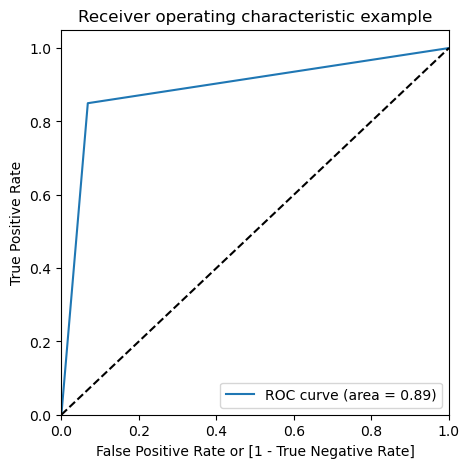

In [710]:
draw_roc(y_train_pred_dict['Converted'],y_train_pred_dict['predicted'])

In [711]:
### Let's find out the proper cut-off value by creating cut-off dataframe
for i in range(1,10):
    cutoff = i/10
    y_train_pred_dict[cutoff] = y_train_pred_dict['Converted_pred'].map(lambda x: 1 if x > cutoff else 0)
y_train_pred_dict.head(10)

,Converted,Converted_pred,predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.032899,0,0,0,0,0,0,0,0,0,0
1,0,0.055496,0,0,0,0,0,0,0,0,0,0
2,0,0.031118,0,0,0,0,0,0,0,0,0,0
3,0,0.162265,0,1,0,0,0,0,0,0,0,0
4,1,0.987028,1,1,1,1,1,1,1,1,1,1
5,0,0.071711,0,0,0,0,0,0,0,0,0,0
6,0,0.004367,0,0,0,0,0,0,0,0,0,0
7,1,0.989635,1,1,1,1,1,1,1,1,1,1
8,0,0.003374,0,0,0,0,0,0,0,0,0,0
9,1,0.963328,1,1,1,1,1,1,1,1,1,1


In [712]:
y_train_pred_dict

,Converted,Converted_pred,predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.032899,0,0,0,0,0,0,0,0,0,0
1,0,0.055496,0,0,0,0,0,0,0,0,0,0
2,0,0.031118,0,0,0,0,0,0,0,0,0,0
3,0,0.162265,0,1,0,0,0,0,0,0,0,0
4,1,0.987028,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.007246,0,0,0,0,0,0,0,0,0,0
6347,0,0.293830,0,1,1,0,0,0,0,0,0,0
6348,0,0.012190,0,0,0,0,0,0,0,0,0,0
6349,0,0.300538,0,1,1,1,0,0,0,0,0,0


In [713]:
## Let's create another dataframe to find the proper cutoff
cutoff_df = pd.DataFrame(columns = ['Prob','accuracy','sensitivity','specificity','precision','recall'])
cutoff_df['Prob'] = [i/10 for i in range(1,10)]
cutoff_df['accuracy'] = [accuracy_score(y_train_pred_dict['Converted'],y_train_pred_dict[i/10]) for i in range(1,10)]
cutoff_df['precision'] = [precision_score(y_train_pred_dict['Converted'],y_train_pred_dict[i/10]) for i in range(1,10)]
cutoff_df['recall'] = [precision_score(y_train_pred_dict['Converted'],y_train_pred_dict[i/10]) for i in range(1,10)]

In [714]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity','precision','recall'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_dict.Converted, y_train_pred_dict[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    precision = precision_score(y_train_pred_dict.Converted, y_train_pred_dict[i])
    recall    = recall_score(y_train_pred_dict.Converted, y_train_pred_dict[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision,recall]    
print(cutoff_df)

     prob  accuracy  sensitivity  specificity  precision    recall
0.1   0.1  0.784601     0.967144     0.675635   0.640268  0.967144
0.2   0.2  0.813415     0.952401     0.730450   0.678368  0.952401
0.3   0.3  0.876397     0.895114     0.865225   0.798572  0.895114
0.4   0.4  0.896709     0.868155     0.913754   0.857321  0.868155
0.5   0.5  0.901118     0.849621     0.931858   0.881556  0.849621
0.6   0.6  0.891356     0.805392     0.942670   0.893458  0.805392
0.7   0.7  0.866950     0.707245     0.962283   0.917988  0.707245
0.8   0.8  0.850575     0.631845     0.981142   0.952381  0.631845
0.9   0.9  0.819084     0.533698     0.989439   0.967914  0.533698


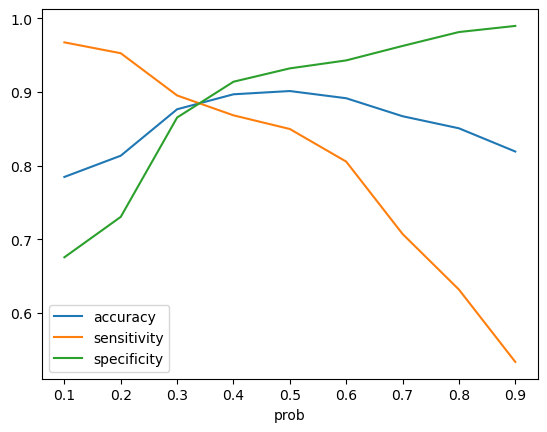

In [715]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [716]:
### Looks like we have the cutoff value at around 3.2 to 3.4. let's take 3.3 as cutoff value
y_train_pred_dict['model_cutoff'] = y_train_pred_dict['Converted_pred'].map(lambda x: 1 if x > 0.33 else 0)

In [717]:
y_train_pred_dict

,Converted,Converted_pred,predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,model_cutoff
0,0,0.032899,0,0,0,0,0,0,0,0,0,0,0
1,0,0.055496,0,0,0,0,0,0,0,0,0,0,0
2,0,0.031118,0,0,0,0,0,0,0,0,0,0,0
3,0,0.162265,0,1,0,0,0,0,0,0,0,0,0
4,1,0.987028,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.007246,0,0,0,0,0,0,0,0,0,0,0
6347,0,0.293830,0,1,1,0,0,0,0,0,0,0,0
6348,0,0.012190,0,0,0,0,0,0,0,0,0,0,0
6349,0,0.300538,0,1,1,1,0,0,0,0,0,0,0


In [718]:
### Add Lead Score to Training data
y_train_pred_dict['Lead_Score'] = y_train_pred_dict['Converted_pred'].map(lambda x: round(x*100,4))

In [719]:
y_train_pred_dict.head()

,Converted,Converted_pred,predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,model_cutoff,Lead_Score
0,0,0.032899,0,0,0,0,0,0,0,0,0,0,0,3.2899
1,0,0.055496,0,0,0,0,0,0,0,0,0,0,0,5.5496
2,0,0.031118,0,0,0,0,0,0,0,0,0,0,0,3.1118
3,0,0.162265,0,1,0,0,0,0,0,0,0,0,0,16.2265
4,1,0.987028,1,1,1,1,1,1,1,1,1,1,1,98.7028


#### Model Evaluation based on model cutoff

In [720]:
print('Accuracy',accuracy_score(y_train_pred_dict['Converted'],y_train_pred_dict['model_cutoff']))
cm = confusion_matrix(y_train_pred_dict['Converted'],y_train_pred_dict['model_cutoff'])
## According to Confusion matrix guide
TN = cm[0,0]  #True Negative
FN = cm[1,0]  #False Negative
TP = cm[1,1]  #True Positive
FP = cm[0,1]  #False Positive
print('Precision',precision_score(y_train_pred_dict['Converted'],y_train_pred_dict['model_cutoff']))
print('Recall',recall_score(y_train_pred_dict['Converted'],y_train_pred_dict['model_cutoff']))
print('Sensitivity: ',round(TP/(TP+FN),4))
print('Specificity: ',round(TN/(TN+FP),4))
print('False Positive Rate: ',round(FP/(FP+TN)),4)
print('True Positive Rate: ',round(TP/(TP+FN),4))

Accuracy 0.8855298378208156
Precision 0.8215540804373291
Recall 0.8862679022746419
Sensitivity:  0.8863
Specificity:  0.8851
False Positive Rate:  0 4
True Positive Rate:  0.8863


### Model Evalation on test dataset

In [721]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [722]:
X_test.shape

(2723, 79)

In [723]:
X_train_rfe.columns.shape

(16,)

In [724]:
X_test = X_test[X_train_rfe.columns]

In [725]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
465,0.042553,0.154489,1,0,0,0,0,0,0,0,0,0,1,0,1,0
5424,0.028369,0.301496,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3503,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4465,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5394,0.028369,0.072183,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [726]:
logreg_7

In [727]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = logreg_7.predict(X_test_sm)

In [728]:
y_test_pred_dict = pd.DataFrame({
    'Converted': y_test,
    'pred' : y_test_pred
})

In [729]:
y_test_pred_dict.head()

,Converted,pred
465,0,0.086376
5424,0,0.005386
3503,0,0.001623
4465,0,0.001623
5394,0,0.262199


In [730]:
y_test_pred_dict['Converted_pred'] = y_test_pred_dict['pred'].map(lambda x: 1 if x > 0.33 else 0)

### Calculate metrics parameters for test data

In [731]:
y_test_pred_dict.head()

,Converted,pred,Converted_pred
465,0,0.086376,0
5424,0,0.005386,0
3503,0,0.001623,0
4465,0,0.001623,0
5394,0,0.262199,0


In [732]:
print('Accuracy',accuracy_score(y_test_pred_dict['Converted'],y_test_pred_dict['Converted_pred']))
cm = confusion_matrix(y_test_pred_dict['Converted'],y_test_pred_dict['Converted_pred'])
## According to Confusion matrix guide
TN = cm[0,0]  #True Negative
FN = cm[1,0]  #False Negative
TP = cm[1,1]  #True Positive
FP = cm[0,1]  #False Positive
print('Precision',precision_score(y_test_pred_dict['Converted'],y_test_pred_dict['Converted_pred']))
print('Recall',recall_score(y_test_pred_dict['Converted'],y_test_pred_dict['Converted_pred']))
print('Sensitivity: ',round(TP/(TP+FN),4))
print('Specificity: ',round(TN/(TN+FP),4))
print('False Positive Rate: ',round(FP/(FP+TN)),4)
print('True Positive Rate: ',round(TP/(TP+FN),4))

Accuracy 0.8850532500918105
Precision 0.8257839721254355
Recall 0.8934967012252591
Sensitivity:  0.8935
Specificity:  0.8797
False Positive Rate:  0 4
True Positive Rate:  0.8935


## Final Conclusion
### Test data
Accuracy : 89% <br>
Precision : 82% <br>
Recall : 89% <br>
Sensitivity : 89% <br>
Specificity : 87% <br>
TruePositive Rate : 89% <br>
False Positive rate : 60% <br>

### Train Data
Accuracy 88% <br>
Precision 82 % <br>
Recall 88% <br>
Sensitivity:  88% <br>
Specificity:  88% <br>
False Positive Rate:  60% <br>
True Positive Rate:  88% <br>